In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

In [4]:
print("📊 Customer Churn Analysis - Part 2")
print("=" * 50)
print("Learning Objectives:")
print("• Explore categorical vs numerical features")
print("• Identify patterns related to churn")
print("• Create meaningful visualizations")
print("• Understand correlation analysis")
print("=" * 50)


📊 Customer Churn Analysis - Part 2
Learning Objectives:
• Explore categorical vs numerical features
• Identify patterns related to churn
• Create meaningful visualizations
• Understand correlation analysis


In [5]:
print("\n🔄 Loading Data...")
print("-" * 30)

# Load the cleaned dataset from Part 1
df = pd.read_csv('../data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Apply the same cleaning steps from Part 1
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Quick verification
print(f"✅ Dataset loaded: {df.shape}")
print(f"✅ Churn rate: {(df['Churn'] == 'Yes').mean():.1%}")


🔄 Loading Data...
------------------------------
✅ Dataset loaded: (7043, 21)
✅ Churn rate: 26.5%


In [6]:
print("\n🗂️  FEATURE CATEGORIZATION")
print("-" * 35)

# Define feature categories
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_features = [col for col in df.columns 
                       if col not in numerical_features + ['customerID', 'Churn']]

# Service-related features
service_features = ['PhoneService', 'MultipleLines', 'InternetService', 
                   'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                   'TechSupport', 'StreamingTV', 'StreamingMovies']

# Customer profile features  
profile_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

# Contract & billing features
contract_features = ['Contract', 'PaperlessBilling', 'PaymentMethod']

print(f"📊 Numerical Features: {len(numerical_features)}")
print(f"📋 Categorical Features: {len(categorical_features)}")
print(f"   - Service Features: {len(service_features)}")
print(f"   - Profile Features: {len(profile_features)}")
print(f"   - Contract Features: {len(contract_features)}")


🗂️  FEATURE CATEGORIZATION
-----------------------------------
📊 Numerical Features: 3
📋 Categorical Features: 16
   - Service Features: 9
   - Profile Features: 4
   - Contract Features: 3


In [7]:
print("\n🗂️  STEP 1: Understanding Our Feature Types")
print("-" * 42)

# Separate categorical and numerical columns
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_features = [col for col in df.columns if col not in numerical_features + ['customerID', 'Churn']]

print(f"📊 Numerical Features ({len(numerical_features)}):")
for feature in numerical_features:
    print(f"   • {feature}")

print(f"\n📋 Categorical Features ({len(categorical_features)}):")
for i, feature in enumerate(categorical_features, 1):
    print(f"   {i:2d}. {feature}")



🗂️  STEP 1: Understanding Our Feature Types
------------------------------------------
📊 Numerical Features (3):
   • tenure
   • MonthlyCharges
   • TotalCharges

📋 Categorical Features (16):
    1. gender
    2. SeniorCitizen
    3. Partner
    4. Dependents
    5. PhoneService
    6. MultipleLines
    7. InternetService
    8. OnlineSecurity
    9. OnlineBackup
   10. DeviceProtection
   11. TechSupport
   12. StreamingTV
   13. StreamingMovies
   14. Contract
   15. PaperlessBilling
   16. PaymentMethod



📈 STEP 2: Numerical Features Analysis
--------------------------------------


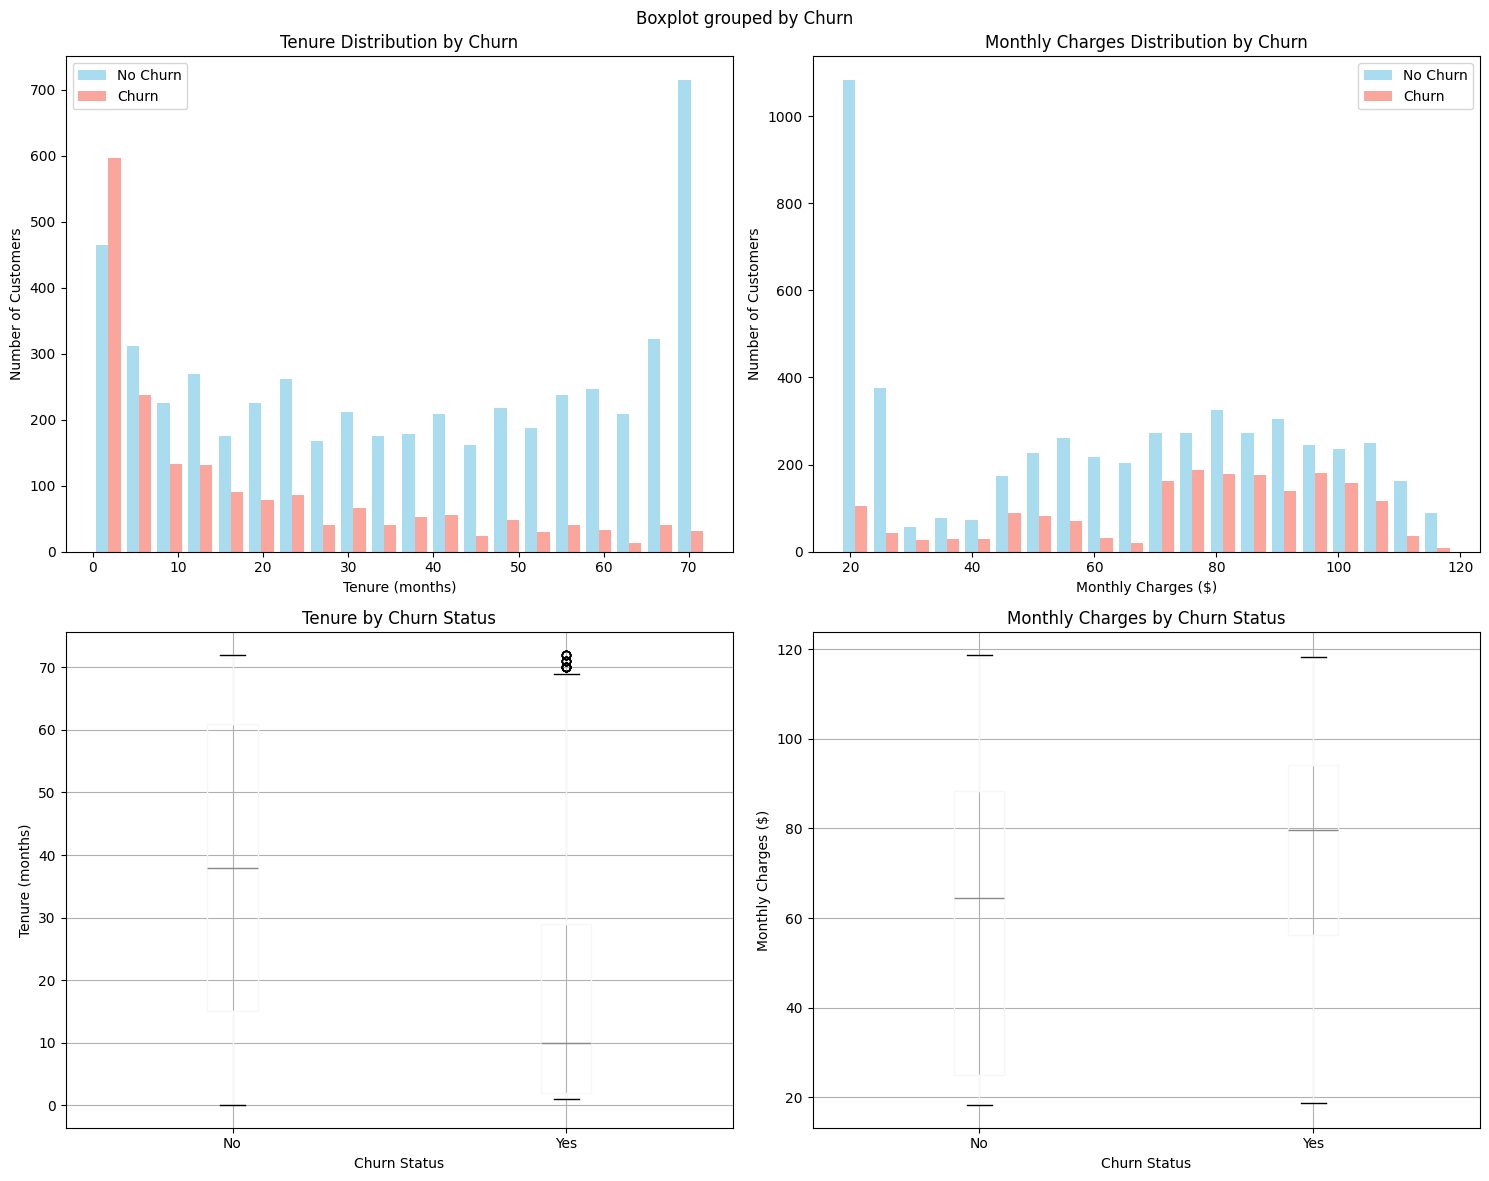


📊 Statistical Summary by Churn Status:
----------------------------------------

tenure:
        mean  median    std
Churn                      
No     37.57    38.0  24.11
Yes    17.98    10.0  19.53

MonthlyCharges:
        mean  median    std
Churn                      
No     61.27   64.43  31.09
Yes    74.44   79.65  24.67

TotalCharges:
          mean   median      std
Churn                           
No     2555.34  1683.60  2329.46
Yes    1531.80   703.55  1890.82


In [8]:
print("\n📈 STEP 2: Numerical Features Analysis")
print("-" * 38)

# Create subplots for numerical features
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Numerical Features vs Churn Analysis', fontsize=16, fontweight='bold')

# 1. Tenure distribution by churn
axes[0,0].hist([df[df['Churn']=='No']['tenure'], df[df['Churn']=='Yes']['tenure']], 
               bins=20, alpha=0.7, label=['No Churn', 'Churn'], color=['skyblue', 'salmon'])
axes[0,0].set_title('Tenure Distribution by Churn')
axes[0,0].set_xlabel('Tenure (months)')
axes[0,0].set_ylabel('Number of Customers')
axes[0,0].legend()

# 2. Monthly Charges distribution by churn
axes[0,1].hist([df[df['Churn']=='No']['MonthlyCharges'], df[df['Churn']=='Yes']['MonthlyCharges']], 
               bins=20, alpha=0.7, label=['No Churn', 'Churn'], color=['skyblue', 'salmon'])
axes[0,1].set_title('Monthly Charges Distribution by Churn')
axes[0,1].set_xlabel('Monthly Charges ($)')
axes[0,1].set_ylabel('Number of Customers')
axes[0,1].legend()

# 3. Box plot for tenure
df.boxplot(column='tenure', by='Churn', ax=axes[1,0])
axes[1,0].set_title('Tenure by Churn Status')
axes[1,0].set_xlabel('Churn Status')
axes[1,0].set_ylabel('Tenure (months)')

# 4. Box plot for monthly charges
df.boxplot(column='MonthlyCharges', by='Churn', ax=axes[1,1])
axes[1,1].set_title('Monthly Charges by Churn Status')
axes[1,1].set_xlabel('Churn Status')
axes[1,1].set_ylabel('Monthly Charges ($)')

plt.tight_layout()
plt.show()

# Statistical summary by churn
print("\n📊 Statistical Summary by Churn Status:")
print("-" * 40)
for feature in numerical_features:
    print(f"\n{feature}:")
    summary = df.groupby('Churn')[feature].agg(['mean', 'median', 'std']).round(2)
    print(summary)



📋 STEP 3: Categorical Features Deep Dive
----------------------------------------


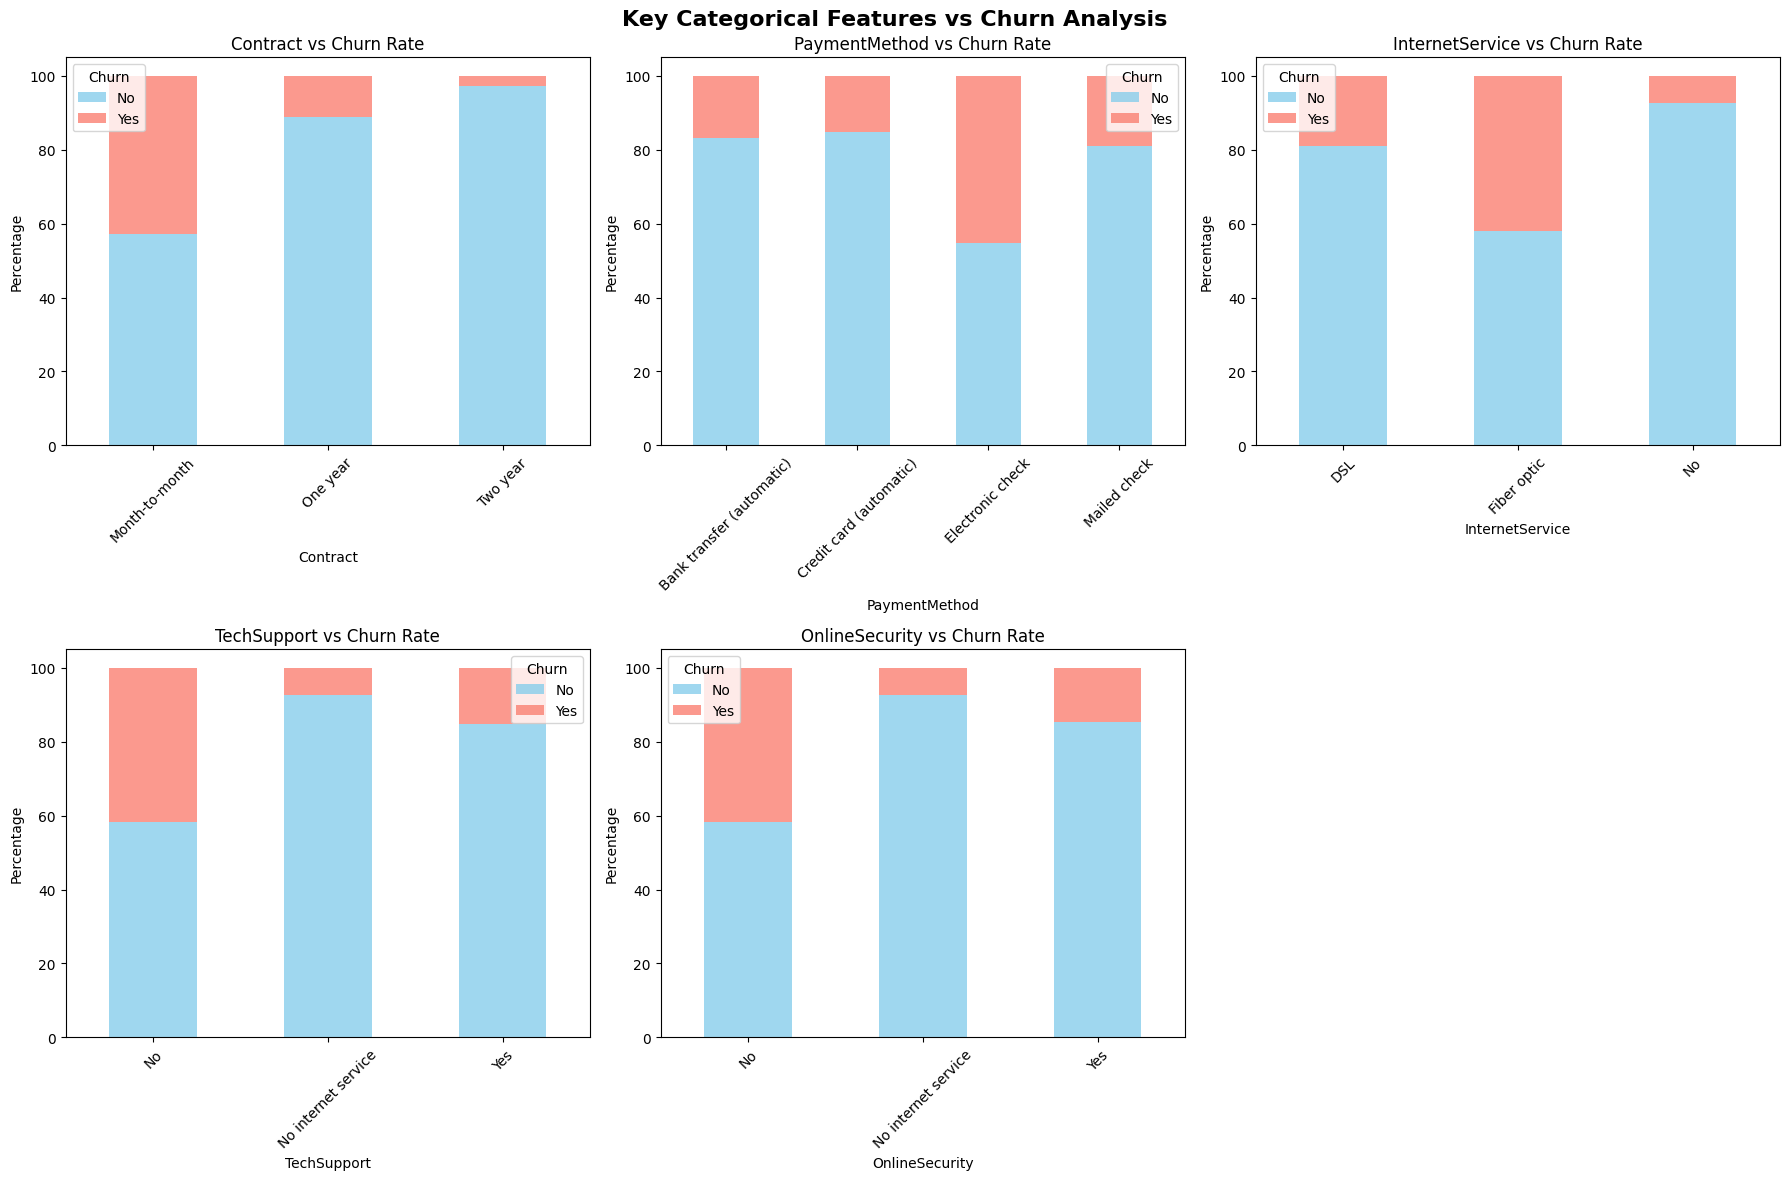


🎯 Churn Rates by Category:
----------------------------

Contract:
   Month-to-month: 42.7%
   One year: 11.3%
   Two year: 2.8%

PaymentMethod:
   Bank transfer (automatic): 16.7%
   Credit card (automatic): 15.2%
   Electronic check: 45.3%
   Mailed check: 19.1%

InternetService:
   DSL: 19.0%
   Fiber optic: 41.9%
   No: 7.4%

TechSupport:
   No: 41.6%
   No internet service: 7.4%
   Yes: 15.2%

OnlineSecurity:
   No: 41.8%
   No internet service: 7.4%
   Yes: 14.6%


In [9]:
print("\n📋 STEP 3: Categorical Features Deep Dive")
print("-" * 40)

# Select key categorical features to analyze
key_categorical = ['Contract', 'PaymentMethod', 'InternetService', 'TechSupport', 'OnlineSecurity']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Key Categorical Features vs Churn Analysis', fontsize=16, fontweight='bold')

for i, feature in enumerate(key_categorical):
    row = i // 3
    col = i % 3
    
    # Create cross-tabulation
    crosstab = pd.crosstab(df[feature], df['Churn'])
    crosstab_pct = pd.crosstab(df[feature], df['Churn'], normalize='index') * 100
    
    # Create stacked bar plot
    crosstab_pct.plot(kind='bar', stacked=True, ax=axes[row, col], 
                     color=['skyblue', 'salmon'], alpha=0.8)
    axes[row, col].set_title(f'{feature} vs Churn Rate')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Percentage')
    axes[row, col].legend(title='Churn', labels=['No', 'Yes'])
    axes[row, col].tick_params(axis='x', rotation=45)

# Remove empty subplot
axes[1, 2].remove()

plt.tight_layout()
plt.show()

# Print churn rates for key categories
print("\n🎯 Churn Rates by Category:")
print("-" * 28)
for feature in key_categorical:
    print(f"\n{feature}:")
    churn_rates = df.groupby(feature)['Churn'].apply(lambda x: (x=='Yes').mean() * 100).round(1)
    for category, rate in churn_rates.items():
        print(f"   {category}: {rate}%")


📈 NUMERICAL FEATURES DEEP DIVE
----------------------------------------


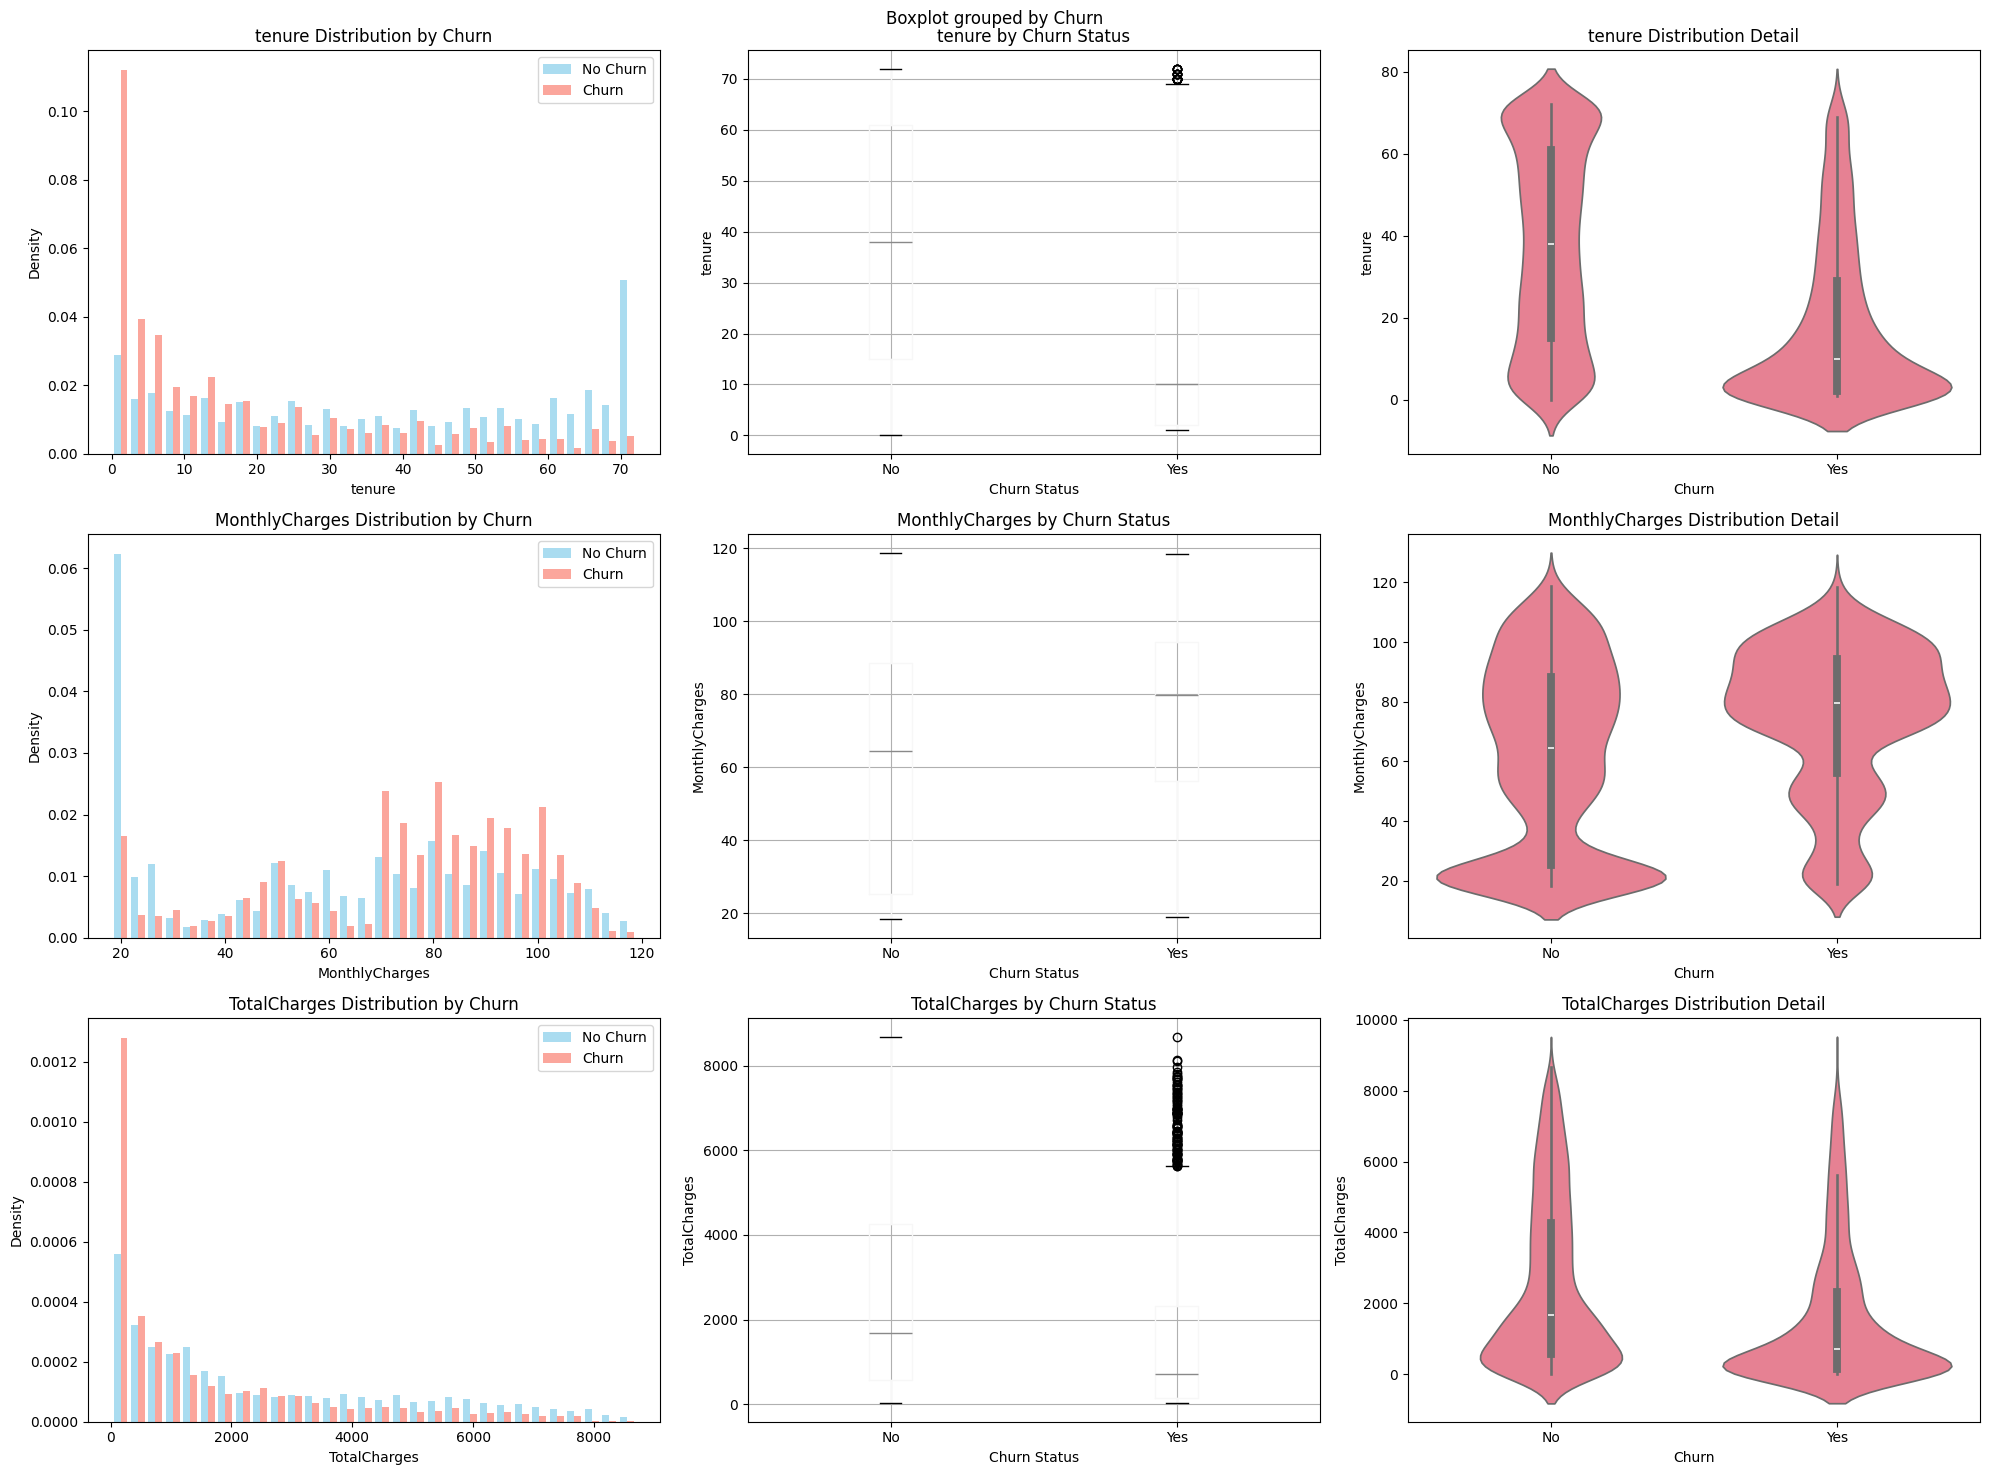


📊 STATISTICAL SUMMARY BY CHURN:
-----------------------------------
      tenure                      MonthlyCharges                       \
       count   mean median    std          count   mean median    std   
Churn                                                                   
No      5174  37.57   38.0  24.11           5174  61.27  64.43  31.09   
Yes     1869  17.98   10.0  19.53           1869  74.44  79.65  24.67   

      TotalCharges                             
             count     mean   median      std  
Churn                                          
No            5163  2555.34  1683.60  2329.46  
Yes           1869  1531.80   703.55  1890.82  


In [10]:
print("\n📈 NUMERICAL FEATURES DEEP DIVE")
print("-" * 40)

# Create comprehensive numerical analysis
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle('Comprehensive Numerical Features Analysis', fontsize=16, fontweight='bold')

for i, feature in enumerate(numerical_features):
    # Distribution plots
    axes[i, 0].hist([df[df['Churn']=='No'][feature], df[df['Churn']=='Yes'][feature]], 
                   bins=30, alpha=0.7, label=['No Churn', 'Churn'], 
                   color=['skyblue', 'salmon'], density=True)
    axes[i, 0].set_title(f'{feature} Distribution by Churn')
    axes[i, 0].set_xlabel(feature)
    axes[i, 0].set_ylabel('Density')
    axes[i, 0].legend()
    
    # Box plots
    df.boxplot(column=feature, by='Churn', ax=axes[i, 1])
    axes[i, 1].set_title(f'{feature} by Churn Status')
    axes[i, 1].set_xlabel('Churn Status')
    axes[i, 1].set_ylabel(feature)
    
    # Violin plots for better distribution view
    sns.violinplot(data=df, x='Churn', y=feature, ax=axes[i, 2])
    axes[i, 2].set_title(f'{feature} Distribution Detail')

plt.tight_layout()
plt.savefig('../images/numerical_features_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Statistical summary
print("\n📊 STATISTICAL SUMMARY BY CHURN:")
print("-" * 35)
numerical_summary = df.groupby('Churn')[numerical_features].agg(['count', 'mean', 'median', 'std']).round(2)
print(numerical_summary)



In [11]:
print("\n📋 CATEGORICAL FEATURES ANALYSIS")
print("-" * 40)

# Function to analyze categorical features
def analyze_categorical_feature(feature):
    """Analyze a categorical feature against churn"""
    crosstab = pd.crosstab(df[feature], df['Churn'])
    churn_rates = pd.crosstab(df[feature], df['Churn'], normalize='index')['Yes'] * 100
    
    print(f"\n{feature}:")
    print("-" * len(feature))
    for category in churn_rates.index:
        count = crosstab.loc[category].sum()
        rate = churn_rates[category]
        print(f"  {category:<20}: {rate:5.1f}% churn ({count:,} customers)")
    
    return churn_rates

# Analyze key categorical features
print("\n🎯 CHURN RATES BY CATEGORY:")
churn_insights = {}

for feature_group, features in [
    ("CONTRACT & BILLING", contract_features),
    ("SERVICES", service_features[:6]),  # Top 6 services
    ("CUSTOMER PROFILE", profile_features)
]:
    print(f"\n{'='*50}")
    print(f"{feature_group}")
    print(f"{'='*50}")
    
    for feature in features:
        churn_rates = analyze_categorical_feature(feature)
        churn_insights[feature] = churn_rates.max()


📋 CATEGORICAL FEATURES ANALYSIS
----------------------------------------

🎯 CHURN RATES BY CATEGORY:

CONTRACT & BILLING

Contract:
--------
  Month-to-month      :  42.7% churn (3,875 customers)
  One year            :  11.3% churn (1,473 customers)
  Two year            :   2.8% churn (1,695 customers)

PaperlessBilling:
----------------
  No                  :  16.3% churn (2,872 customers)
  Yes                 :  33.6% churn (4,171 customers)

PaymentMethod:
-------------
  Bank transfer (automatic):  16.7% churn (1,544 customers)
  Credit card (automatic):  15.2% churn (1,522 customers)
  Electronic check    :  45.3% churn (2,365 customers)
  Mailed check        :  19.1% churn (1,612 customers)

SERVICES

PhoneService:
------------
  No                  :  24.9% churn (682 customers)
  Yes                 :  26.7% churn (6,361 customers)

MultipleLines:
-------------
  No                  :  25.0% churn (3,390 customers)
  No phone service    :  24.9% churn (682 customers)
  Yes


🎨 CREATING HIGH-IMPACT VISUALIZATIONS
---------------------------------------------


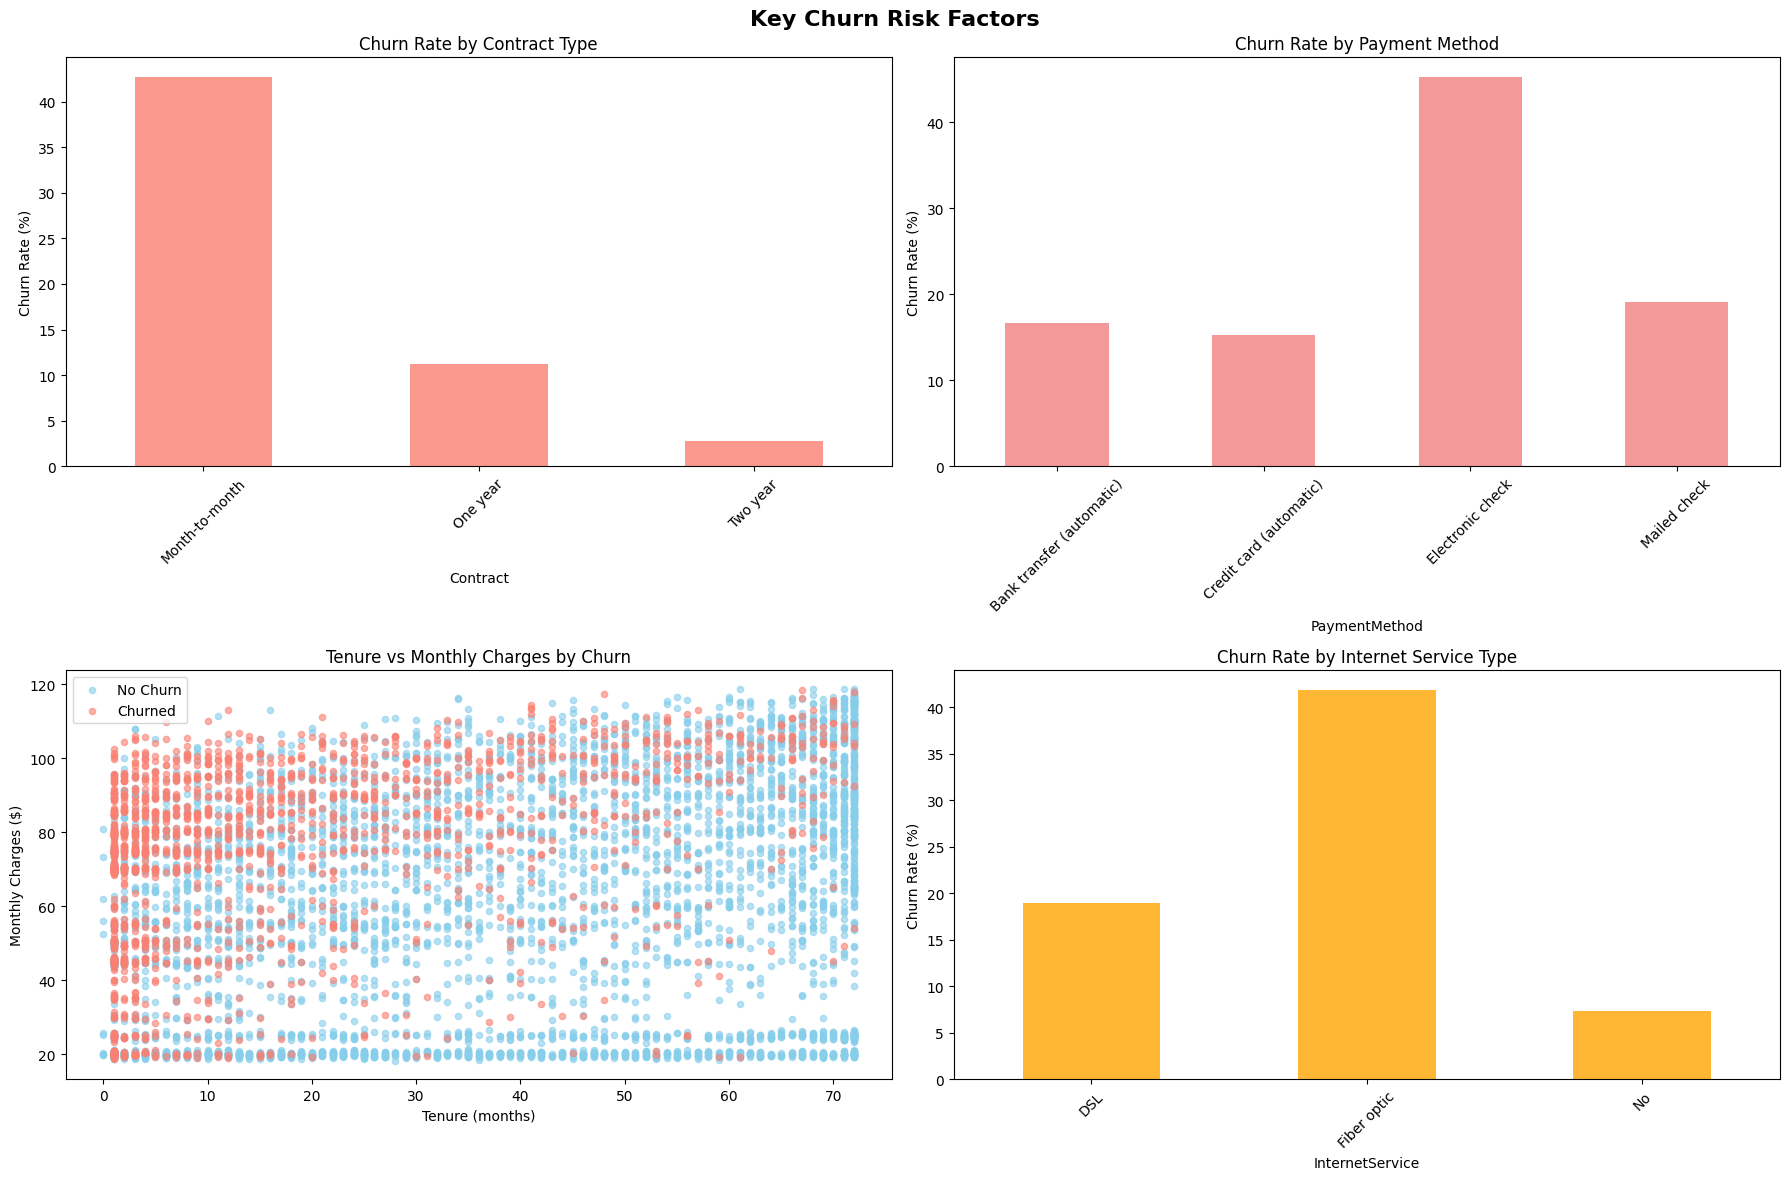

In [12]:

print("\n🎨 CREATING HIGH-IMPACT VISUALIZATIONS")
print("-" * 45)

# 1. Top risk factors visualization
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Key Churn Risk Factors', fontsize=16, fontweight='bold')

# Contract type analysis
contract_churn = df.groupby('Contract')['Churn'].apply(lambda x: (x=='Yes').mean() * 100)
contract_churn.plot(kind='bar', ax=axes[0,0], color='salmon', alpha=0.8)
axes[0,0].set_title('Churn Rate by Contract Type')
axes[0,0].set_ylabel('Churn Rate (%)')
axes[0,0].tick_params(axis='x', rotation=45)

# Payment method analysis  
payment_churn = df.groupby('PaymentMethod')['Churn'].apply(lambda x: (x=='Yes').mean() * 100)
payment_churn.plot(kind='bar', ax=axes[0,1], color='lightcoral', alpha=0.8)
axes[0,1].set_title('Churn Rate by Payment Method')
axes[0,1].set_ylabel('Churn Rate (%)')
axes[0,1].tick_params(axis='x', rotation=45)

# Tenure vs Monthly Charges scatter plot
churned = df[df['Churn'] == 'Yes']
not_churned = df[df['Churn'] == 'No']

axes[1,0].scatter(not_churned['tenure'], not_churned['MonthlyCharges'], 
                 alpha=0.6, label='No Churn', color='skyblue', s=20)
axes[1,0].scatter(churned['tenure'], churned['MonthlyCharges'], 
                 alpha=0.6, label='Churned', color='salmon', s=20)
axes[1,0].set_xlabel('Tenure (months)')
axes[1,0].set_ylabel('Monthly Charges ($)')
axes[1,0].set_title('Tenure vs Monthly Charges by Churn')
axes[1,0].legend()

# Internet service analysis
internet_churn = df.groupby('InternetService')['Churn'].apply(lambda x: (x=='Yes').mean() * 100)
internet_churn.plot(kind='bar', ax=axes[1,1], color='orange', alpha=0.8)
axes[1,1].set_title('Churn Rate by Internet Service Type')
axes[1,1].set_ylabel('Churn Rate (%)')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('../images/key_risk_factors.png', dpi=300, bbox_inches='tight')
plt.show()


🔗 CORRELATION ANALYSIS
-------------------------


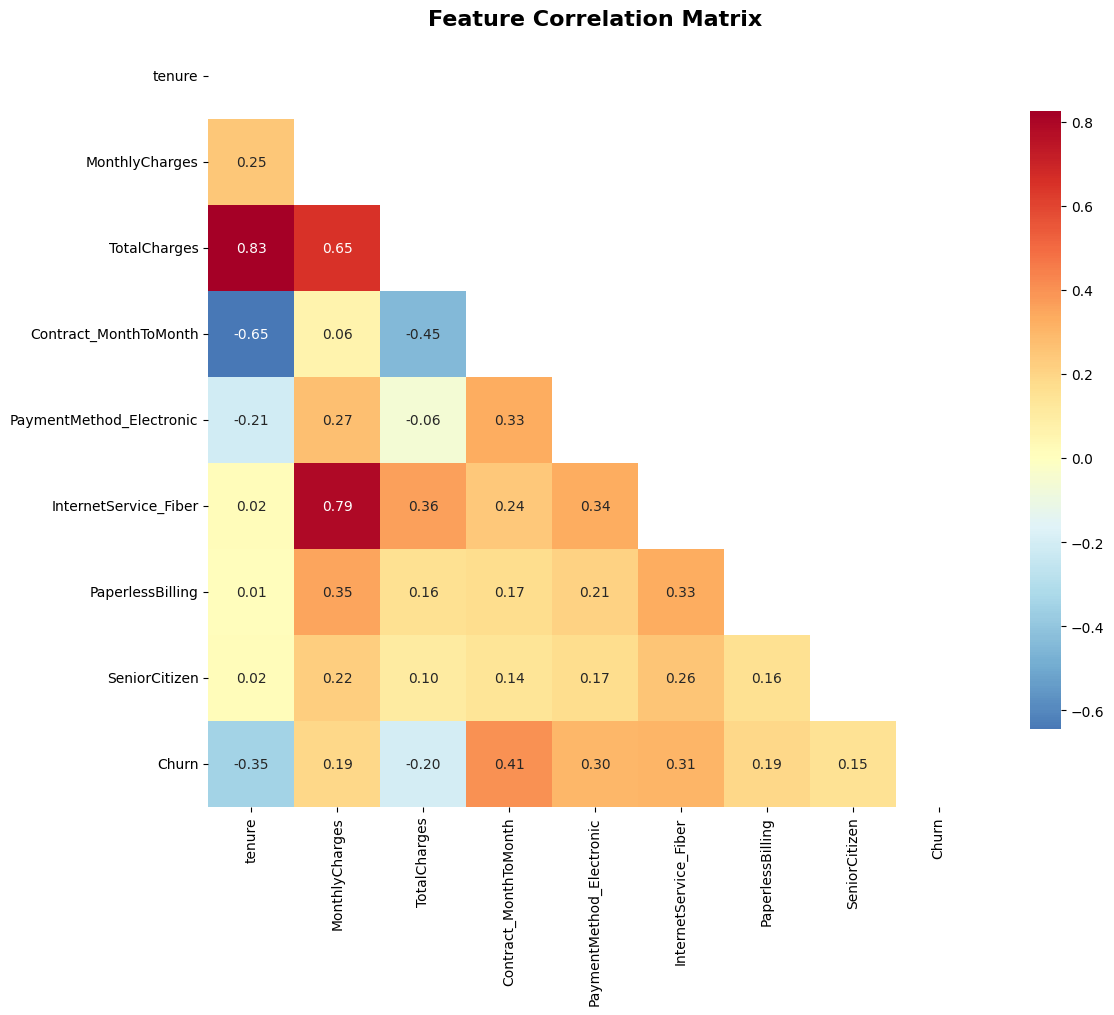


🎯 FEATURES MOST CORRELATED WITH CHURN:
----------------------------------------
  Contract_MonthToMonth    : 0.405 (positive)
  tenure                   : 0.352 (negative)
  InternetService_Fiber    : 0.308 (positive)
  PaymentMethod_Electronic : 0.302 (positive)
  TotalCharges             : 0.199 (negative)
  MonthlyCharges           : 0.193 (positive)
  PaperlessBilling         : 0.192 (positive)
  SeniorCitizen            : 0.151 (positive)


In [13]:
print("\n🔗 CORRELATION ANALYSIS")
print("-" * 25)

# Create correlation dataset
df_corr = df.copy()
df_corr['Churn'] = df_corr['Churn'].map({'Yes': 1, 'No': 0})

# Convert key categorical variables to numerical
categorical_mappings = {
    'Contract_MonthToMonth': (df_corr['Contract'] == 'Month-to-month').astype(int),
    'PaymentMethod_Electronic': (df_corr['PaymentMethod'] == 'Electronic check').astype(int),
    'InternetService_Fiber': (df_corr['InternetService'] == 'Fiber optic').astype(int),
    'PaperlessBilling': df_corr['PaperlessBilling'].map({'Yes': 1, 'No': 0}),
    'SeniorCitizen': df_corr['SeniorCitizen']
}

for name, values in categorical_mappings.items():
    df_corr[name] = values

# Select features for correlation
correlation_features = numerical_features + list(categorical_mappings.keys()) + ['Churn']
correlation_matrix = df_corr[correlation_features].corr()

# Create correlation heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdYlBu_r', 
            center=0, square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('../images/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Show top correlations with churn
churn_correlations = correlation_matrix['Churn'].abs().sort_values(ascending=False)
print("\n🎯 FEATURES MOST CORRELATED WITH CHURN:")
print("-" * 40)
for feature, corr in churn_correlations.items():
    if feature != 'Churn':
        direction = "positive" if correlation_matrix['Churn'][feature] > 0 else "negative"
        print(f"  {feature:<25}: {corr:.3f} ({direction})")

In [15]:
print("\n💡 KEY INSIGHTS SUMMARY")
print("-" * 30)

# Calculate key metrics
insights = {
    'avg_tenure_churn': df[df['Churn']=='Yes']['tenure'].mean(),
    'avg_tenure_no_churn': df[df['Churn']=='No']['tenure'].mean(),
    'avg_charges_churn': df[df['Churn']=='Yes']['MonthlyCharges'].mean(),
    'avg_charges_no_churn': df[df['Churn']=='No']['MonthlyCharges'].mean(),
}

print(f"\n🔍 BEHAVIORAL PATTERNS:")
print(f"   • Churned customers average tenure: {insights['avg_tenure_churn']:.1f} months")
print(f"   • Loyal customers average tenure: {insights['avg_tenure_no_churn']:.1f} months")
print(f"   • Churned customers monthly charges: ${insights['avg_charges_churn']:.2f}")
print(f"   • Loyal customers monthly charges: ${insights['avg_charges_no_churn']:.2f}")

print(f"\n🚨 HIGHEST RISK SEGMENTS:")
# Find highest risk categories
risk_categories = []
for feature, max_churn_rate in churn_insights.items():
    if max_churn_rate > 40:
        churn_rates = df.groupby(feature)['Churn'].apply(lambda x: (x=='Yes').mean() * 100)
        max_category = churn_rates.idxmax()
        risk_categories.append((feature, max_category, max_churn_rate))

for feature, category, rate in sorted(risk_categories, key=lambda x: x[2], reverse=True):
    print(f"   • {feature}: '{category}' ({rate:.1f}% churn rate)")

print(f"\n📋 RECOMMENDATIONS FOR NEXT PHASE:")
print("   • Focus on tenure and monthly charges for feature engineering")
print("   • Create contract risk categories") 
print("   • Engineer payment method risk indicators")
print("   • Build service bundle features")
print("   • Consider customer lifetime value calculations")

print(f"\n✅ ANALYSIS COMPLETE!")
print("=" * 60)
print("📁 Outputs saved:")
print("   • ../images/numerical_features_analysis.png")
print("   • ../images/key_risk_factors.png") 
print("   • ../images/correlation_matrix.png")
print("=" * 60)



💡 KEY INSIGHTS SUMMARY
------------------------------

🔍 BEHAVIORAL PATTERNS:
   • Churned customers average tenure: 18.0 months
   • Loyal customers average tenure: 37.6 months
   • Churned customers monthly charges: $74.44
   • Loyal customers monthly charges: $61.27

🚨 HIGHEST RISK SEGMENTS:
   • PaymentMethod: 'Electronic check' (45.3% churn rate)
   • Contract: 'Month-to-month' (42.7% churn rate)
   • InternetService: 'Fiber optic' (41.9% churn rate)
   • OnlineSecurity: 'No' (41.8% churn rate)
   • SeniorCitizen: '1' (41.7% churn rate)

📋 RECOMMENDATIONS FOR NEXT PHASE:
   • Focus on tenure and monthly charges for feature engineering
   • Create contract risk categories
   • Engineer payment method risk indicators
   • Build service bundle features
   • Consider customer lifetime value calculations

✅ ANALYSIS COMPLETE!
📁 Outputs saved:
   • ../images/numerical_features_analysis.png
   • ../images/key_risk_factors.png
   • ../images/correlation_matrix.png
